<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/Color_Images_Flowers_With_Augmentation_Using_CNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Flowers Image Classification With Image Augmentation


In [0]:
#@title Import Packages

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

import glob
import shutil

In [0]:
#@title Import TensorFlow And Keras Layers


In the cell below, import Tensorflow and the Keras layers and models you will use to build your CNN. Also, import the ImageDataGenerator from Keras so that you can perform image augmentation.

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#@title Data Loading


In order to build our image classifier, we can begin by downloading the flowers dataset. We first need to download the archive version of the dataset and after the download we are storing it to "/tmp/" directory.

In [16]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname = "flower_photos.tgz",
                                   extract = True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulpis']

In [19]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 128 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulpis: 0 Images


In [20]:
round(len(images) * 0.8)

0

In [0]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
#@title Data Augmentation


Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

In [0]:
#@title Experiment with Various Image Transformations


In [0]:
#@title Set Batch And Image Size


In [0]:
# In the cell below, create a batch_size of 100 images and set a value to IMG_SHAPE such that our training data consists of images with width of 150 pixels and height of 150 pixels.
batch_size = 100
IMG_SHAPE = 150

In [0]:
#@title Apply Random Horizontal Flip


In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [25]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2398 images belonging to 4 classes.


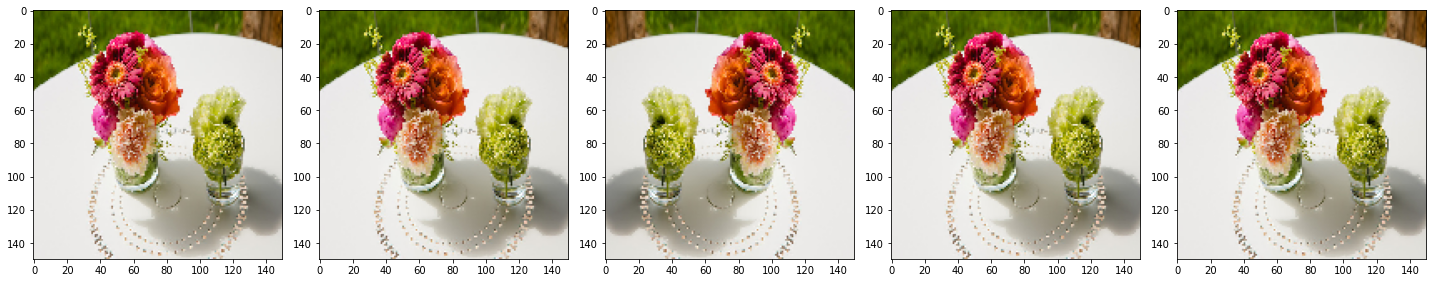

In [26]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Apply Random Rotation


In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [27]:
# The rotation augmentation will randomly rotate the image up to a specified number of degrees. Here, we'll set it to 45.
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2398 images belonging to 4 classes.


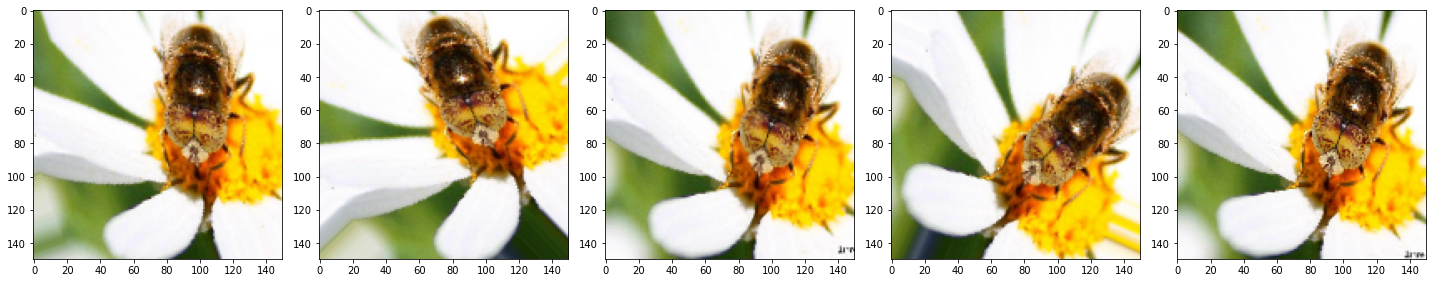

In [28]:
# Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Apply Random Zoom


In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [29]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2398 images belonging to 4 classes.


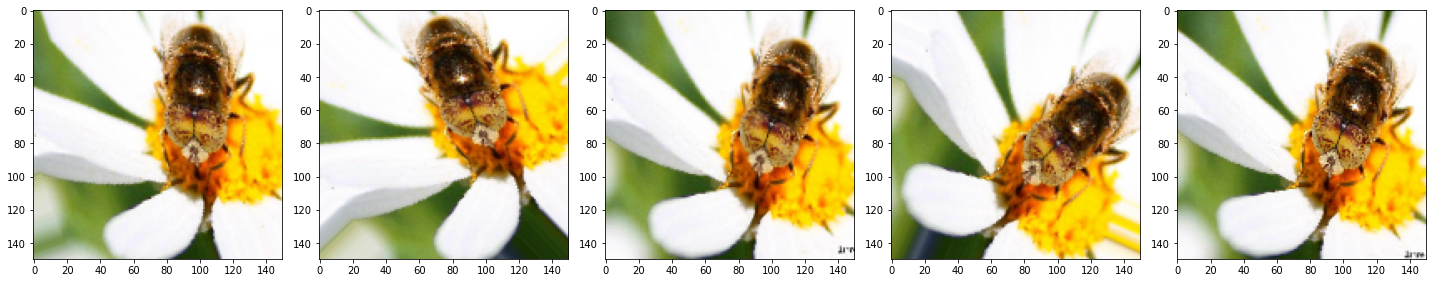

In [30]:
# Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.
aumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Putting It All Together

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

*   random 45 degree rotation
*   random zoom of up to 50%
*   random horizontal flip
*   width shift of 0.15
*   height shift of 0.15

Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.

In [46]:
image_gen_train = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 45, 
      width_shift_range = .15, 
      height_shift_range = .15,
      zoom_range = 0.5, 
      horizontal_flip = True,
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size, 
                                                 directory = train_dir, 
                                                 shuffle = True, 
                                                 target_size = (IMG_SHAPE, IMG_SHAPE), 
                                                 class_mode = 'sparse')

Found 2398 images belonging to 4 classes.


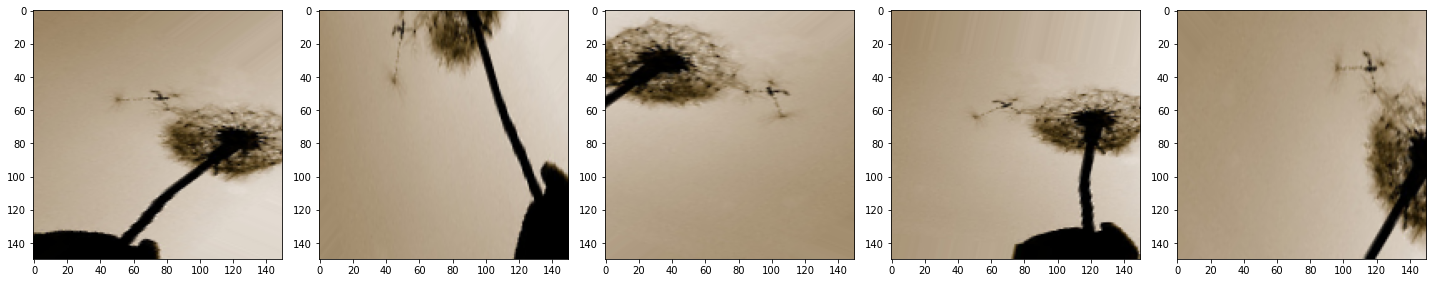

In [47]:
# Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Create a Data Generator For The Validation Set


Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the .flow_from_directory method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. Remember that it is not necessary to shuffle the images in the validation set.

In [48]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size, 
                                                 directory = val_dir, 
                                                 target_size = (IMG_SHAPE, IMG_SHAPE), 
                                                 class_mode = 'sparse') 

Found 473 images belonging to 4 classes.


In [0]:
#@title Model Creation


In [0]:
#@title Create The CNN


In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the softmax activation function. All other layers should use a relu activation function. You should also add Dropout layers with a probability of 20%, where appropriate.

In [0]:
model = Sequential()

model.add(Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [0]:
#@title Compile The Model


As usual, we will use the adam optimizer. Since we output a softmax categorization, we'll use sparse_categorical_crossentropy as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [0]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [0]:
#@title Model Summary


In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [0]:
#@title Train The Model


In [52]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
24/24 [==============================] - 20s 839ms/step - loss: 1.3938 - accuracy: 0.3720 - val_loss: 1.1353 - val_accuracy: 0.4799
Epoch 2/80
24/24 [==============================] - 20s 840ms/step - loss: 0.9980 - accuracy: 0.5525 - val_loss: 0.9723 - val_accuracy: 0.6004
Epoch 3/80
24/24 [==============================] - 20s 850ms/step - loss: 0.8974 - accuracy: 0.6364 - val_loss: 0.8189 - val_accuracy: 0.6702
Epoch 4/80
24/24 [==============================] - 20s 850ms/step - loss: 0.8354 - accuracy: 0.6651 - val_loss: 0.8106 - val_accuracy: 0.6596
Epoch 5/80
24/24 [==============================] - 20s 837ms/step - loss: 0.7690 - accuracy: 0.6902 - val_loss: 0.6327 - val_accuracy: 0.7611
Epoch 6/80
24/24 [==============================] - 20s 844ms/step - loss: 0.7517 - accuracy: 0.7077 - val_loss: 0.6217 - val_accuracy: 0.7548
Epoch 7/80
24/24 [==============================] - 20s 839ms/step

In [0]:
#@title Visualizing Results Of The Training


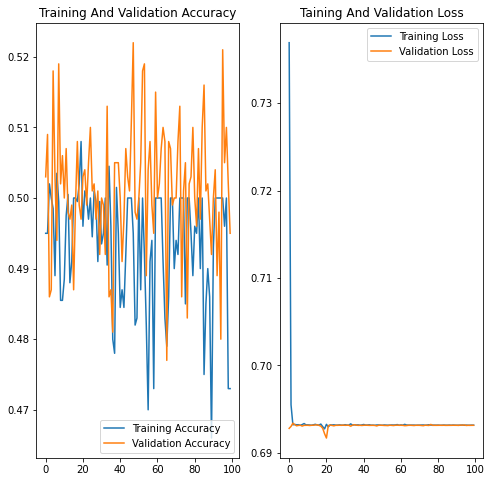

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Taining And Validation Loss')
plt.savefig('./foo.png')
plt.show()